In [59]:
#Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
url = r"D:\Unsorted docs\Bank+Customer+Churn\Bank_Churn_Messy.xlsx"
data = pd.read_excel(url, sheet_name=None)

In [61]:
print(data.keys())

dict_keys(['Customer_Info', 'Account_Info'])


In [62]:
customers = data['Customer_Info']
accounts = data['Account_Info']

In [63]:
customers.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [64]:
accounts.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [65]:
# Join customers and accounts on CustomerId
customer_accounts = accounts.merge(customers, on='CustomerId', how='left')
customer_accounts.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
0,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
2,15647311,€83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,1,€112542.58
3,15619304,€159660.8,3,No,8,No,1,Onio,502,French,Female,42.0,8,€113931.57
4,15701354,€0.0,2,No,1,No,0,Boni,699,FRA,Female,39.0,1,€93826.63


In [66]:
accounts.shape

(10002, 7)

In [67]:
customer_accounts.shape

(10004, 14)

In [68]:
duplicates = customer_accounts[customer_accounts.duplicated()]
duplicates

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
1,15634602,€0.0,1,Yes,2,Yes,1,Hargrave,619,FRA,Female,42.0,2,€101348.88
10001,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10002,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78
10003,15628319,€130142.79,1,No,4,No,0,Walker,792,French,Female,28.0,4,€38190.78


In [69]:
customer_accounts.drop_duplicates(inplace=True)
customer_accounts.shape

(10000, 14)

In [70]:
customer_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  object 
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  object 
 4   Tenure_x         10000 non-null  int64  
 5   IsActiveMember   10000 non-null  object 
 6   Exited           10000 non-null  int64  
 7   Surname          9997 non-null   object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Age              9997 non-null   float64
 12  Tenure_y         10000 non-null  int64  
 13  EstimatedSalary  10000 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [71]:
# Convert Balance to float datatype
customer_accounts['Balance'] = customer_accounts['Balance'].str.replace('€', '', regex = False).astype(float)
# Convert Estimated Salary to float datatype
customer_accounts['EstimatedSalary'] = customer_accounts['EstimatedSalary'].str.replace('€', '', regex = False).astype(float)
#Convert Age to an integer
#customer_accounts['Age'] = customer_accounts['Age'].astype(int)
customer_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Balance          10000 non-null  float64
 2   NumOfProducts    10000 non-null  int64  
 3   HasCrCard        10000 non-null  object 
 4   Tenure_x         10000 non-null  int64  
 5   IsActiveMember   10000 non-null  object 
 6   Exited           10000 non-null  int64  
 7   Surname          9997 non-null   object 
 8   CreditScore      10000 non-null  int64  
 9   Geography        10000 non-null  object 
 10  Gender           10000 non-null  object 
 11  Age              9997 non-null   float64
 12  Tenure_y         10000 non-null  int64  
 13  EstimatedSalary  10000 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 1.1+ MB


In [72]:
#Rows with missing values
customer_accounts[customer_accounts.isna().any(axis=1) == True]

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure_x,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,Tenure_y,EstimatedSalary
29,15728693,141349.43,1,Yes,3,Yes,0,NaN,574,Germany,Female,NaN,3,-999999.0
122,15580203,120193.42,1,No,6,No,0,NaN,674,Spain,Male,NaN,6,-999999.0
9390,15756954,0.00,1,Yes,2,Yes,0,NaN,538,France,Female,NaN,2,-999999.0


In [73]:
customer_accounts = customer_accounts.fillna(value = {"Surname":"MISSING", "Age":customer_accounts["Age"].median()})

In [74]:
customer_accounts.isnull().sum()

CustomerId         0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure_x           0
IsActiveMember     0
Exited             0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure_y           0
EstimatedSalary    0
dtype: int64

In [75]:
customer_accounts.describe()

,CustomerId,Balance,NumOfProducts,Tenure_x,Exited,CreditScore,Age,Tenure_y,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,76485.889288,1.530200,5.012800,0.203700,650.528800,38.921500,5.012800,99762.195289
std,7.193619e+04,62397.405202,0.581654,2.892174,0.402769,96.653299,10.487552,2.892174,60583.863580
min,1.556570e+07,0.000000,1.000000,0.000000,0.000000,350.000000,18.000000,0.000000,-999999.000000
25%,1.562853e+07,0.000000,1.000000,3.000000,0.000000,584.000000,32.000000,3.000000,50910.677500
50%,1.569074e+07,97198.540000,1.000000,5.000000,0.000000,652.000000,37.000000,5.000000,100191.725000
75%,1.575323e+07,127644.240000,2.000000,7.000000,0.000000,718.000000,44.000000,7.000000,149388.247500
max,1.581569e+07,250898.090000,4.000000,10.000000,1.000000,850.000000,92.000000,10.000000,199992.480000


In [76]:
customer_accounts["EstimatedSalary"] = customer_accounts["EstimatedSalary"].replace(-999999, customer_accounts["EstimatedSalary"].median())

In [77]:
customer_accounts['Geography'].value_counts()

Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: Geography, dtype: int64

In [78]:
customer_accounts["Geography"] = np.where(customer_accounts["Geography"].isin(["France","French", "FRA"]), "France", customer_accounts["Geography"])

In [54]:
customer_accounts["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [80]:
customer_accounts.drop(columns=['Tenure_y'], inplace=True)
#Rename Tenure_x to Tenure
customer_accounts.rename(columns={"Tenure_x": "Tenure"}, inplace = True)
customer_accounts.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,Yes,2,Yes,1,Hargrave,619,France,Female,42.0,101348.88
2,15647311,83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,112542.58
3,15619304,159660.80,3,No,8,No,1,Onio,502,France,Female,42.0,113931.57
4,15701354,0.00,2,No,1,No,0,Boni,699,France,Female,39.0,93826.63
5,15737888,125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084.10


In [81]:
customer_accounts.shape

(10000, 13)

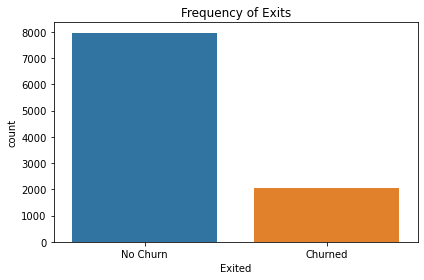

In [87]:
#Bar chart of Churners
sns.countplot(data=customer_accounts, x="Exited")
plt.title("Frequency of Exits")
plt.xticks([0, 1], ["No Churn", "Churned"])
plt.tight_layout()
plt.show()

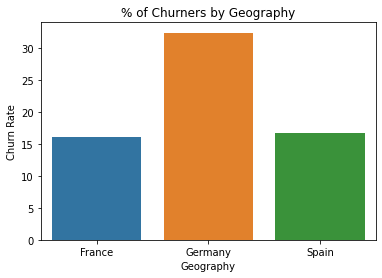

In [88]:
# % of Churners by gender
geography_churn = customer_accounts.groupby("Geography")["Exited"].mean()* 100

sns.barplot(x = geography_churn.index, y = geography_churn.values)
plt.title("% of Churners by Geography")
plt.ylabel("Churn Rate")
plt.show()

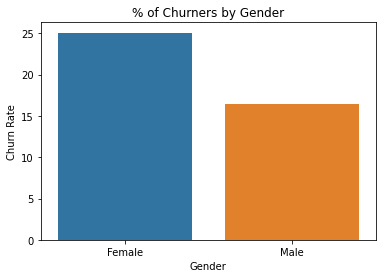

In [89]:
gender_churn = customer_accounts.groupby("Gender")["Exited"].mean() * 100
sns.barplot(x = gender_churn.index, y = gender_churn.values)
plt.title("% of Churners by Gender")
plt.ylabel("Churn Rate")
plt.show()

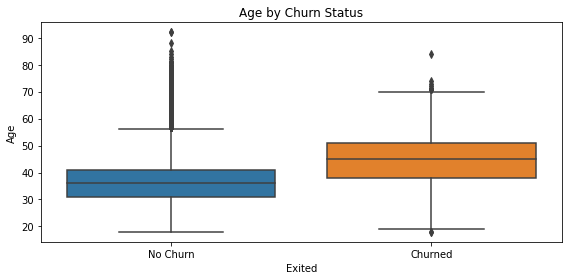

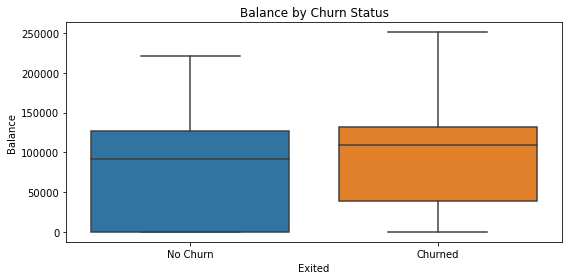

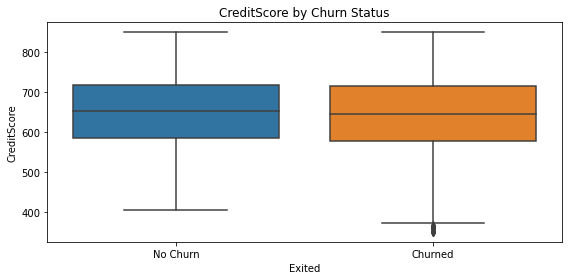

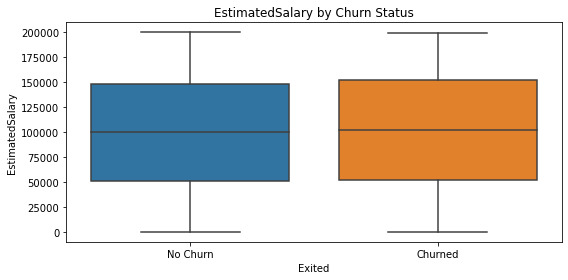

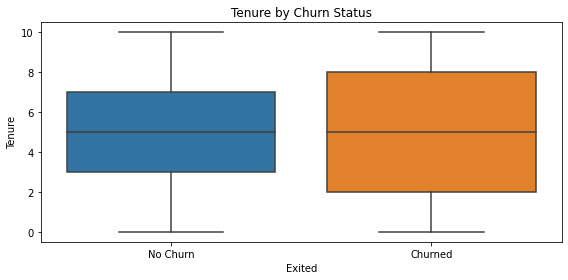

In [90]:
# Obtain numeric columns
numeric_columns = ["Age", "Balance", "CreditScore", "EstimatedSalary","Tenure"]

for col in numeric_columns:
    plt.figure(figsize = (8,4))
    sns.boxplot(x = "Exited", y=col, data = customer_accounts)
    plt.title(f"{col} by Churn Status")
    plt.xticks([0, 1], ["No Churn", "Churned"])
    plt.tight_layout()
    plt.show()

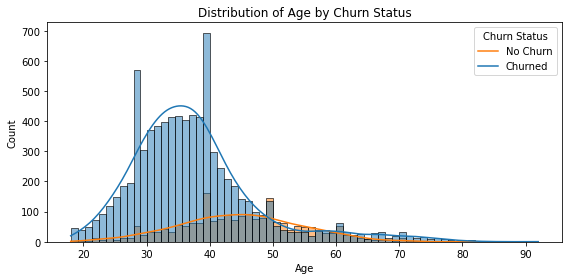

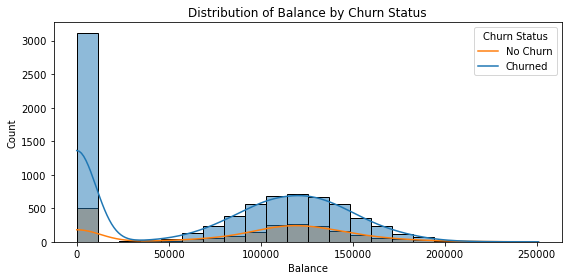

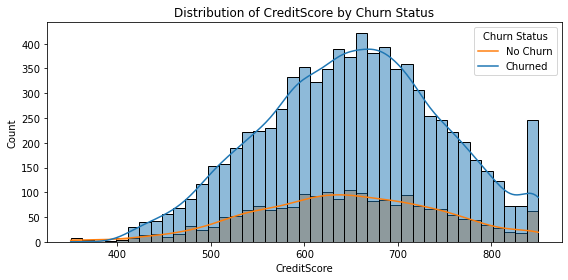

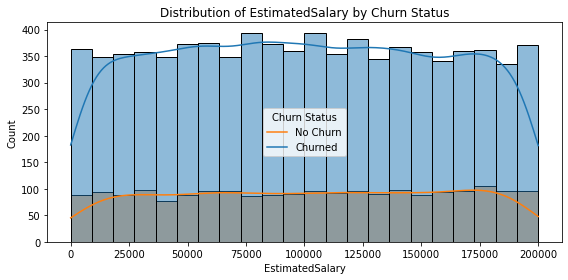

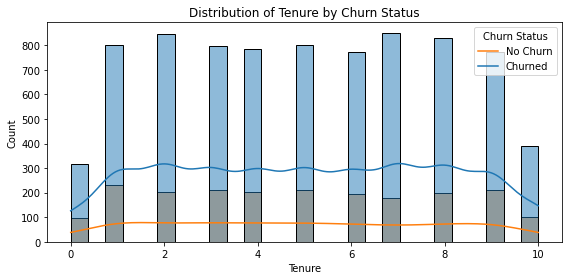

In [91]:
# Histograms
for col in numeric_columns:
    plt.figure(figsize = (8,4))
    sns.histplot(x = col, data = customer_accounts, hue="Exited", kde=True)
    plt.title(f"Distribution of {col} by Churn Status")
    plt.legend(['No Churn', 'Churned'], title="Churn Status")
    plt.tight_layout()
    plt.show()

In [92]:
data = customer_accounts.copy()
data.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary
0,15634602,0.00,1,Yes,2,Yes,1,Hargrave,619,France,Female,42.0,101348.88
2,15647311,83807.86,1,Yes,1,Yes,0,Hill,608,Spain,Female,41.0,112542.58
3,15619304,159660.80,3,No,8,No,1,Onio,502,France,Female,42.0,113931.57
4,15701354,0.00,2,No,1,No,0,Boni,699,France,Female,39.0,93826.63
5,15737888,125510.82,1,Yes,2,Yes,0,Mitchell,850,Spain,Female,43.0,79084.10


In [95]:
data.drop(columns = ["CustomerId","Surname"], inplace = True)

In [97]:
#data = pd.get_dummies(data, columns = ["HasCrCard", "IsActiveMember", "Geography", "Gender"], drop_first = True)
data.head()

,Balance,NumOfProducts,Tenure,Exited,CreditScore,Age,EstimatedSalary,HasCrCard_Yes,IsActiveMember_Yes,Geography_Germany,Geography_Spain,Gender_Male
0,0.00,1,2,1,619,42.0,101348.88,1,1,0,0,0
2,83807.86,1,1,0,608,41.0,112542.58,1,1,0,1,0
3,159660.80,3,8,1,502,42.0,113931.57,0,0,0,0,0
4,0.00,2,1,0,699,39.0,93826.63,0,0,0,0,0
5,125510.82,1,2,0,850,43.0,79084.10,1,1,0,1,0


In [98]:
# Balance vs. Estimated Salary
data["Balance_vs_Salary"] = data['Balance'] / data['EstimatedSalary']

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Balance             10000 non-null  float64
 1   NumOfProducts       10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Exited              10000 non-null  int64  
 4   CreditScore         10000 non-null  int64  
 5   Age                 10000 non-null  float64
 6   EstimatedSalary     10000 non-null  float64
 7   HasCrCard_Yes       10000 non-null  uint8  
 8   IsActiveMember_Yes  10000 non-null  uint8  
 9   Geography_Germany   10000 non-null  uint8  
 10  Geography_Spain     10000 non-null  uint8  
 11  Gender_Male         10000 non-null  uint8  
 12  Balance_vs_Salary   10000 non-null  float64
dtypes: float64(4), int64(4), uint8(5)
memory usage: 1010.0 KB


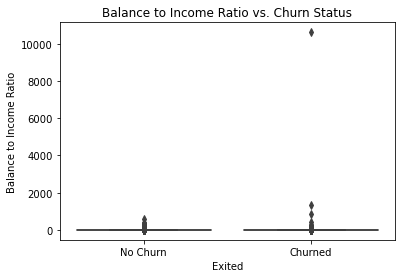

In [102]:
sns.boxplot(data = data, x="Exited", y="Balance_vs_Salary")
plt.title("Balance to Income Ratio vs. Churn Status")
plt.xticks([0,1], ["No Churn", "Churned"])
plt.ylabel("Balance to Income Ratio")
plt.show()